In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
Data = pd.read_csv('/content/cleanedlaeew_insurance.csv')
Data

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,94,28.1,0.167,21,0
1,137,40,168,43.1,2.288,33,1
2,78,50,88,31.0,0.248,26,1
3,197,70,543,30.5,0.158,53,1
4,189,60,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...
387,181,88,510,43.3,0.222,26,1
388,128,88,110,36.5,1.057,37,1
389,88,58,16,28.4,0.766,22,0
390,101,76,180,32.9,0.171,63,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   392 non-null    int64  
 1   BloodPressure             392 non-null    int64  
 2   Insulin                   392 non-null    int64  
 3   BMI                       392 non-null    float64
 4   DiabetesPedigreeFunction  392 non-null    float64
 5   Age                       392 non-null    int64  
 6   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [ ]:
#Remove outlier
Data = Data[np.abs(Data["Glucose"]-
            Data["Glucose"].mean()) <= 
            (3*Data["Glucose"].std())]

Data = Data[np.abs(Data["BloodPressure"]-
           Data["BloodPressure"].mean()) <= 
            (3*Data["BloodPressure"].std())]

Data = Data[np.abs(Data["Insulin"]-
            Data["Insulin"].mean()) <= 
            (3*Data["Insulin"].std())]

Data = Data[np.abs(Data["BMI"]-
            Data["BMI"].mean()) <= 
            (3*Data["BMI"].std())]
            
Data = Data[np.abs(Data["Age"]-
            Data["Age"].mean()) <= 
            (3*Data["Age"].std())]

Data = Data[np.abs(Data["DiabetesPedigreeFunction"]-
            Data["DiabetesPedigreeFunction"].mean()) <= 
            (3*Data["DiabetesPedigreeFunction"].std())]

Data

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,94,28.1,0.167,21,0
2,78,50,88,31.0,0.248,26,1
5,166,72,175,25.8,0.587,51,1
6,118,84,230,45.8,0.551,31,1
8,115,70,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...
386,121,78,74,39.0,0.261,28,0
387,181,88,510,43.3,0.222,26,1
388,128,88,110,36.5,1.057,37,1
389,88,58,16,28.4,0.766,22,0


In [ ]:
Data_x = Data.drop(["Outcome"],axis=1)
Data_x

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,89,66,94,28.1,0.167,21
2,78,50,88,31.0,0.248,26
5,166,72,175,25.8,0.587,51
6,118,84,230,45.8,0.551,31
8,115,70,96,34.6,0.529,32
...,...,...,...,...,...,...
386,121,78,74,39.0,0.261,28
387,181,88,510,43.3,0.222,26
388,128,88,110,36.5,1.057,37
389,88,58,16,28.4,0.766,22


In [ ]:
Data

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,94,28.1,0.167,21,0
2,78,50,88,31.0,0.248,26,1
5,166,72,175,25.8,0.587,51,1
6,118,84,230,45.8,0.551,31,1
8,115,70,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...
386,121,78,74,39.0,0.261,28,0
387,181,88,510,43.3,0.222,26,1
388,128,88,110,36.5,1.057,37,1
389,88,58,16,28.4,0.766,22,0


In [ ]:
Data_y = Data["Outcome"]
Data_y

0      0
2      1
5      1
6      1
8      1
      ..
386    0
387    1
388    1
389    0
391    0
Name: Outcome, Length: 369, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Data_x, Data_y, test_size=0.3, random_state=12)

In [ ]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0])

69.36936936936937


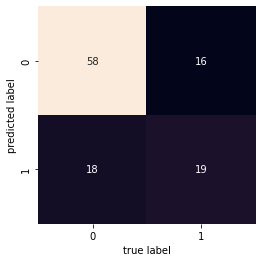

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, )
plt.xlabel('true label')
plt.ylabel('predicted label')


print((accuracy_score(y_test, y_pred))*100)

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
#Data.to_csv('Data Cleaned.csv', index=False)
#Data.predict()